In [1]:
from platform import python_version

print(python_version())

3.9.13


# A - Introduction to Deep Learning 
## Cats vs Dogs 
Welcome to the first module of the Introduction to Deep Learning course at DataScientest.com. Over the course of the different modules that you will have the occasion of having a practical understanding of the basic aspects of deep learning. At the end of this course, you will be well-versed in the various architectures such as Convolutional Neural Networks, Recurrent Neural Network, and also simple, but effective algorithms such as Stochastic Gradient Descent, AdaGrad, AdaProp etc. The emphasis would be towards a practical approach such that towards the end of the course, you can write a simple deep learning system for a learning task or a data-science challenge of your liking.

Before we proceed to the meat of the matter, a few words on Deep Learning. Deep Learning is an umbrella term regrouping a host of architectures, techniques, rules of thumb, and ingenious engineering geared towards solving real problems which till about 5 years ago had reached an impassable barrier in terms of progress. Image classification is a case in point, and a domain where progress has been most relevant (and publicised). We shall tackle image classification in this first module, and go deeper in later modules.

## FAQs
What changed you might ask? Surely, the idea of neural networks, which is what deep learning architectures are at their root, existed well before 2013? And you will be right. Principally, what we did lack were computational resources. But that can't be all either, since computational resources have been growing ever since the 1960's at an exponential rate. If anything, deep learning could have been discovered earlier. In fact, it was: the first papers by Yann LeCun on Convolutional Neural Networks were written in 1998. What changed was access to larger datasets with the arrival of platforms and services such as Google and Facebook. Not only were the datasets large, they were rich and came in multiple forms: textual data in the form of tweets, facebook posts, even whole books on Google Books; pictures such as millions of those posted everyday on social media platforms; videos with youtube being the biggest player. Large quantities of newer types of data required newer, better and more efficient techniques for us to perform learning tasks.

What's deep about Deep Learning? The word deep in Deep Learning stands for the depth of the network. A generic neural network such as the one shown below is a single layer neural network: it has some input units (to the left), a layer called a hidden layer in the middle and finally an output layer.

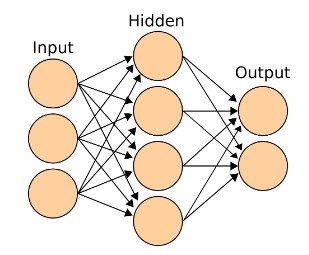

However, a single-layer neural network doesn't have enough richness to capture, say the complexities of a single natural image. To this end, we stack different layers one after the other; the input is fed at one end, undergoes a complex set of transformations to learn the representations of the input, and finally we get the result of the learning task as output. For instance, a typical deep network looks like this:

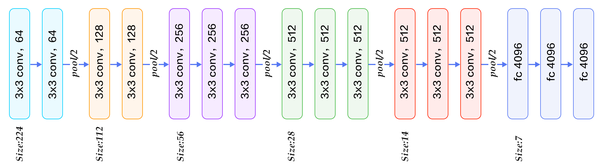

This is in fact the VGG network that we will be constructed later in the module for performing an image classification task. This network has 16 layers with intermediary pooling layers in between. The significance of the names of the layers, and the various numbers will become clearer as we go along.

What's the learning task?: What is precisely being learned? Is the output of a neural network (deep or not) a sequence? How is that learning something? The answer: it depends. For instance, if we want to recognize digits from 0 to 9, from a dataset of handwritten digits, it might be prudent to have a network which outputs 10 numbers, one for each digits. Further, we could decide whether the output should be probabilistic or definitive i.e. either the network provides us with a probability of the number being 0 (or 2 or 9) or it returns a sequence such as  00100000000010000000 , meaning that the digit recognized is 2.

The learning task can be divided into two parts:

Training Phase : During the phase, we say the network learns. Precisely, the network constructs a representation of the input data so as to be able to perform the learning task. In the case of digit recognition, it can construct representations of the curvature of the digits, their degree of curvature, whether the digit is open (such as 5) or a closed loop (such as 8). This is also called the learning phase, since the network learns what distinguishes one network from another.

Prediction Phase: During this phase, based on the representations learned, we now want to see how good this representation is. We do this by comparing the output of the network with the known label (or value) of the input data.

How does the network learn? Intuitively, if we input a digit, say 3, to the network, we want that the network output with high probability that the digit is in fact 3 (or input the corresponding sequence). Thus, again intuitively, we want to reduce the number of misidentified input data points. Mathematically, this misidentification can be written as a cost function, that is the network pays a cost every time it misidentifies an input. We thus have to design an algorithm in such a manner so as to reduce this cost. A typical loss-function is the Cross-entropy loss:

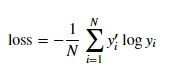

## PyTorch
For this course, we will use the PyTorch framework developed by Facebook https://pytorch.org/, Nvidia and a some institutional partners such as University of Oxford and ENS, Paris. There are many reasons for having chosen this framework over others. Primary among them is the relative ease of use since the API is quite similar to Numpy. It also supports automatic gradient calculation which allows for greater flexibility to create novel architectures. It is blessed with great GPU support. Finally, it allows for the creation of the network from within C++, and disposes of a C++ backend as well. This could be useful for users looking to put their networks into production.

## Getting started with CNNs
To get ourselves accustomed with the nitty-gritties of deep networks, let us begin with a network that has had the most success: Convolutional Neural Networks (CNNs). The task in question is a classification task, inspired from the Kaggle challenge Dogs vs Cats. The challenge is to create a classifier that is able to distinguish cats from dogs. There are 25000 labelled images of dogs and cats which are used for training, and 12500 images for testing the performance of our training algorithm. If we check the leaderboard for this competition, the best score was around 0.98 i.e. a success rate of 98%. To put that in perspective, the state of the art in 2013, when this competition was started was around 80%. No wonder CNNs have completely revolutionised the sphere of image classification tasks.

For this first task however, we won't use the complete data-set of 25000 (+12500 test) images. We shall use a smaller set of images which can be found in the data folder. Of course, if you are ambitious enough, you can run it on the complete dataset, which can be downloaded from the Kaggle website or from Jeffrey Howard's website here. (fait sur kaggle dogs-vs-cats.zip)

So lets get started

### Some basic imports 
Perform the following operations:

Import the package Image from the PIL library
Import the library numpy as np
Import the library os
Import the library time
Import the module matplotlib.pyplot as plt. Add the following line
%matplotlib inline

In [2]:
from PIL import Image 
import numpy as np 
import os 
import time
import matplotlib.pyplot as plt  
%matplotlib inline

## Import PyTorch functionalities 
Perform the following operations:

Import the torch library
Import the module torch.nn as nn
From the module torch.autograd module import the sub-module Variable
Import the library torchvision
From the library torchvision import the modules models, transforms and datasets
Import the library bcolz
   bcolz  is a useful library for fast I/O access without using too much memory, since I/O for large images (and large datasets) could be extremely time-consuming.

In [3]:
import torch
import torch.nn as nn 
from torch.autograd import Variable
import torchvision
from torchvision import models,transforms,datasets
import bcolz

ModuleNotFoundError: No module named 'bcolz'

Check that the torch library has been correctly loaded by running torch.__version__

Check whether you can use torch's GPU functionalities. This is done via the function is_available in the cuda sub-module of the torch library. Store the result of this function in a variable use_gpu

If the function is_available returns False, then your computer doesn't have a GPU, and hence you won't be able to use the GPU functionalities provided by torch

In [4]:
print(torch.__version__)
use_gpu = torch.cuda.is_available()  # -> 0.4.0 chez DS et 1.12.1 chez moi !

1.12.1


## Preliminary Data Processing 
Before moving towards the fun part of setting up a neural network, we have to first load the data and perform some necessary transformations on it so that it is in the format required for the network. Since we shall be using the VGG-network, there are a certain number of requirements for the images we shall use to train.

For computer vision applications, the developers of PyTorch have created a different library titled torchvision, which contains useful datasets and functions for computer vision and image classification and manipulation tasks.

As mentioned, for the VGGnet, we must transform our images to the correct format. We shall use the transforms module which we already imported earlier.

Each color image has three channels: Red, Green and Blue (RGB). Our first task would be normalize the images so that each pixel value for each channel is between 0 and 1.

Create a transformation object called normalize using the transforms.Normalize function so that the Red, Green and Blue channels have the following mean and standard deviation pairs: (0.485, 0.229), (0.456, 0.224), (0.406, 0.225)

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

Normalization is just one of the steps required. We must also crop the images so that they have the size 224x224, and convert them into tensors as well. Remember that PyTorch works on tensors.

Rather than creating a new object for each transformation, we can compose multiple transformations using the Compose function in the transforms sub-module.

Create a transformation object composed_transforms containing the transformations to crop the images to size 224x224, to transform to a tensor and finally normalize them.

In [ ]:
composed_transforms = transforms.Compose([transforms.CenterCrop(224),transforms.ToTensor(), normalize])

Once these transformations have been created, we can now load the images into memory. To begin, we have provided a small sample of the complete dogs vs cats dataset in the folder data/module1. There are two folders train and valid for training and validation respectively.

- Store the path to the data data/module_1 in a variable called data_dir
- Using the ImageFolder function from the datasets module, load the images into an object called dataset.
- Print the type of the object dataset

    datasets  is sub-module of the torchvision library. It is extremely useful for loading large data-sets and providing them to the network during training and validation. It provides multi-threaded support as well.

In [ ]:
data_dir = 'data/module_1'
dataset = {x: datasets.ImageFolder(os.path.join(data_dir, x), composed_transforms)
         for x in ['train', 'valid']}
print(type(dataset))
# -> <class 'dict'>

In [ ]:
Examine the classes attribute of dataset and verify that they correspond to cats and dogs
Use the imgs attribute to see the first 10 and last 10 images of the dataset (train set)

In [ ]:
"""
['cats', 'dogs']
['cats', 'dogs']
[('data/module_1/train/cats/cat.10171.jpg', 0), ('data/module_1/train/cats/cat.10539.jpg', 0), ('data/module_1/train/cats/cat.10740.jpg', 0), ('data/module_1/train/cats/cat.10903.jpg', 0), ('data/module_1/train/cats/cat.11269.jpg', 0), ('data/module_1/train/cats/cat.11278.jpg', 0), ('data/module_1/train/cats/cat.11295.jpg', 0), ('data/module_1/train/cats/cat.11300.jpg', 0), ('data/module_1/train/cats/cat.11519.jpg', 0), ('data/module_1/train/cats/cat.11540.jpg', 0)]
[('data/module_1/train/dogs/dog.879.jpg', 1), ('data/module_1/train/dogs/dog.884.jpg', 1), ('data/module_1/train/dogs/dog.9166.jpg', 1), ('data/module_1/train/dogs/dog.9384.jpg', 1), ('data/module_1/train/dogs/dog.9480.jpg', 1), ('data/module_1/train/dogs/dog.9511.jpg', 1), ('data/module_1/train/dogs/dog.9657.jpg', 1), ('data/module_1/train/dogs/dog.9695.jpg', 1), ('data/module_1/train/dogs/dog.9749.jpg', 1), ('data/module_1/train/dogs/dog.9979.jpg', 1)]
"""

Compute the number of images in the train and valid set and store them in a dictionary named dataset_sizes

In [ ]:
dataset_sizes = {x: len(dataset[x]) for x in ['train', 'valid']}
print(dataset_sizes)
# -> {'train': 1200, 'valid': 120}

The dataset object is a dict type, with the keys train and valid. We must now create an object which loads the dataset in memory. Remember that dataset contains only the references, and the labels of the images but not the images themselves.

For this end, we use the DataLoader function, whose signature can be found here.

Load the dataset of images using the function DataLoader with a batch size of 4. Call this object dataset_loader
Write a function to_shuffle which takes in an argument and returns True if the argument is train and False otherwise
    to_shuffle  allows us to have the training set shuffled but not the validation set when we will perform the training.

In [ ]:
def to_shuffle(x):
    if x == 'train':
        return True
    else:
        return False
    
dataset_loader = {x: torch.utils.data.DataLoader(dataset[x], batch_size=4,
                                               shuffle=to_shuffle(x), num_workers=6)
                for x in ['train', 'valid']}

Create another object dataset_valid using the function DataLoader with only the images to be used in validation step.

In [ ]:
dataset_valid = torch.utils.data.DataLoader(dataset['valid'], batch_size=4, shuffle=True, num_workers=6)

Till now we have been manipulating the dataset without really visualising what these images contain. So let's take a slight detour and see the various cats and dogs we have in the dataset.

Remember that the batch size is 4, i.e. each time we get an element from either dataset_valid or dataset_loader, we will get 4 images and not just 1. This is an example of a tensor in PyTorch, which holds not just an image but a bunch of them. Given that each image has 3 channels: Red, Green and Blue, this tensor will be of size 4x3x224x224.

Let us verify if it is really the case

Print the contents of the first entry of dataset_valid object. The actual data is stored in the attribute dataset of the object

In [ ]:
print(dataset_valid.dataset[0])

In [ ]:
"""

(tensor([[[-2.0152, -2.0152, -2.0152,  ...,  0.0056, -0.0458, -0.0801],
         [-2.0152, -2.0152, -2.0152,  ..., -0.0287, -0.1657, -0.1486],
         [-2.0152, -2.0152, -2.0152,  ..., -0.1314, -0.1999, -0.1486],
         ...,
         [-1.9809, -1.9980, -2.0152,  ..., -0.4226, -0.5253, -0.5596],
         [-1.9467, -1.9295, -1.9809,  ..., -0.6281, -0.6452, -0.6452],
         [-1.8953, -1.9124, -1.9124,  ..., -0.7650, -0.6794, -0.6109]],

        [[-1.1253, -1.1253, -1.1253,  ..., -0.2850, -0.3375, -0.3725],
         [-1.1253, -1.1253, -1.1253,  ..., -0.3200, -0.4601, -0.4426],
         [-1.1253, -1.1253, -1.1253,  ..., -0.4251, -0.4951, -0.4426],
         ...,
         [-0.7927, -0.7752, -0.7927,  ..., -0.3901, -0.5126, -0.5476],
         [-0.7927, -0.7752, -0.7752,  ..., -0.6001, -0.6527, -0.6352],
         [-0.8102, -0.7752, -0.7752,  ..., -0.7577, -0.6877, -0.6352]],

        [[-0.4798, -0.4798, -0.4798,  ..., -0.5147, -0.6018, -0.6367],
         [-0.4798, -0.4798, -0.4798,  ..., -0.5495, -0.6890, -0.6715],
         [-0.4798, -0.4798, -0.4798,  ..., -0.6541, -0.7238, -0.6715],
         ...,
         [-0.0267, -0.0267, -0.0441,  ..., -0.5147, -0.5670, -0.5321],
         [-0.0790, -0.0441, -0.0615,  ..., -0.7587, -0.7413, -0.6193],
         [-0.1138, -0.0964, -0.0964,  ..., -0.9156, -0.7761, -0.6367]]]), 0)
"""

We remark that this has two pieces of data: the first is a tensor and the other is simply 0.

What do you think this zero stands for? Try a couple of other elements to figure out

In [ ]:
"""
Insert your comment here
"""

The second element is indeed the label of the image. But how do we know which is which

Use the attribute class_to_idx of the dataset object to determine the label corresponding to the integer. You can use either the train or valid data.

In [ ]:
print(dataset['train'].class_to_idx)
# -> 
{'cats': 0, 'dogs': 1}

As we can see the last line says that we have a tensor of size 3x224x224, that is it holds the first image of our dataset. However, we haven't yet seen how we are in fact holding 4 images at a time.

To see that this is the case, we must iterate over dataset_valid. We shall print the shape of the data as we iterate over dataset_valid.

Write a for-loop to iterate over dataset_valid. Within the loop, print the shape of the image data and the label corresponding to the image

In [ ]:
"""

torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])
"""

Now we see that each entry in the dataset_valid object is a tensor of size 4x3x224x224. And the number of times the loop runs is 30, which is consistent with the number of images in valid, 40.

To visualise these images, we shall use matplotlib library. However, we must invert the normalization that we performed earlier. Furthermore, matplotlib requires the data to be in numpy format. Fortunately, each object created in torch possesses a function numpy which allows us to perform matrix operations such as transposes etc.

Write a function show_grid1 to visualise (plot) the images in one batch of dataset_valid. Your function should first transpose the tensor and then undo the changes of the normalization performed earlier. Finally, use plt.imshow to plot the images. We provide a skeleton for this function. below.

In [ ]:
def show_grid1(tensor):
    tensor = tensor.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    # code added here
    tensor = std*tensor + mean 

    # The next two lines are required to maintain the image values between 0 and 1
    tensor[tensor > 1] = 1 
    tensor[tensor < 0] = 0
    plt.figure(figsize = (20,2))    

    # code added here
    plt.imshow(tensor)

Run the following cell

In [ ]:
inputs, classes = next(iter(dataset_loader['train']))
n_images = 4
out = torchvision.utils.make_grid(inputs[0:n_images])


Test the function show_grid1 in the code below

In [ ]:
show_grid1(out)

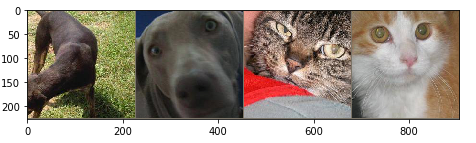

## Setting up the VGG model 
Now we are ready to get to the good stuff. Since this is just the first module, we wont be training neural nets just yet. Rather, we take an existing neural network and use it for our classification task. The network in question is the VGG-net. torchvision already contains a certain number of pretrained models which we can use to study, poke around, or experiment with.

Load the vgg16 model using the models sub-module from torchvision. Set the argument pretrained to True since we don't want to perform the training just yet. Call the object vgg

In [ ]:
vgg = models.vgg16(pretrained=True)

Use the print command to see the various layers in the vgg network

In [ ]:
"""
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace)
    (2): Dropout(p=0.5)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace)
    (5): Dropout(p=0.5)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)
"""

We observe that the network is broadly divided into two sections: features and classifier. features contain the layers such as Conv2d, ReLU and MaxPool2d. We shall learn more about these in later modules.

classifier contains linear layers, also known as fully connected layers, with some ReLU and Dropout operations. The final output is given via the last layer which is a linear one, and gives us 1000 values. These 1000 values correspond to the 1000 classes present in the ImageNet dataset. We have provided a json file with these classes.

- Load this json file and store the data in imagenet_classes
- Print the number of classes.
- To appreciate the variety of the dataset, print few elements of imagenet_classes.

In [ ]:
import json
file_path = 'assets/imagenet_class_index.json'
with open(file_path) as f:
    data_dict = json.load(f)
    
imagenet_classes = [data_dict[str(i)][1] for i in range(len(data_dict))]
print(len(imagenet_classes))

imagenet_classes[500:510]

In [ ]:
"""
1000
['cliff_dwelling',
 'cloak',
 'clog',
 'cocktail_shaker',
 'coffee_mug',
 'coffeepot',
 'coil',
 'combination_lock',
 'computer_keyboard',
 'confectionery']
 """

We want to differentiate between cats and dogs not between keyboards and tiger sharks. The way forward is to change the final layer of the net so that it outputs two numbers, which we will later interpret as probabilities that the input image is a cat or a dog. Further, since the network is already pre-trained, we don't want to change the parameters within the network. This is achieved by telling torch to not compute gradients when doing the optimisation.

Thus two steps are required

1 - Telling the layers in features to not compute gradients while optimisation
2 - Replacing the very final layer so that it outputs two numbers

Set all weights in the network to not compute gradients during training. This is achieved via required_grad attribute.
Change the last layer in the classifier to be a Linear layer of size 4096x2. All neural network layers are found in the torch.nn module
Verify that the last layer has been changed
   The importance of computing gradients will become clearer when we learn about backpropagation, and how to train networks.

In [ ]:
for weight in vgg.parameters():
    weight.requires_grad = False
    
vgg.classifier._modules['6'] = nn.Linear(4096, 2)

for weight in vgg.classifier[6].parameters():
    weight.requires_grad = True

print(vgg.classifier)

In [ ]:
"""

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=2, bias=True)
)
"""

We will now use pre-calculated features to perform training. These are provided in a folder vgg16 and are stored as bcolz files. We have four files:

train_features.bc -> Store the features of for the training set
train_labels.bc -> Stores the labels of the training set
val_features.bc -> Stores the features of the validation set
val_labels.bc -> Stores the labels of the validation set.

Use the load_array function to store each of these files in variables train_feat, train_label, val_feat and val_label.

   load_array  is a function provided in the utils.py  file. You might need to import this file before being able to use the load_array  function

In [ ]:
from utils import *
train_feat = load_array(data_dir+'/vgg16/train_features.bc')
train_label = load_array(data_dir+'/vgg16/train_labels.bc')
val_feat = load_array(data_dir+'/vgg16/val_features.bc')
val_label = load_array(data_dir+'/vgg16/val_labels.bc')

These features have been calculated by passing the training and validation data through the features section of the VGG network. We note that the output from the features section is a tensor of size 512x7x7. Thus train_feat would be a tensor of size 1200x512x7x7, 1200 being the number of images in the train dataset

Verify that the train_feat is a tensor of size 1200x512x7x7

In [ ]:
print(train_feat.shape)
# -> (1200, 512, 7, 7)

We have now almost everything we need to train our network. A final step is the choice of an optimizer. Since we are just starting out, we shall use a very simple Stochastic Gradient Descent optimizer. Furthermore, we only require the optimization of the last layer, since the other weights have been already recovered.

torch has many optimizing routines in the optim sub-module. We shall use the SGD optimizer. We will learn more about stochastic gradient descent and other optimization algorithms in later modules.

Define a variable learning_rate and initalize with the value 1e-4
Declare an optimizer optimizer_vgg with a learning rate learning_rate for the last layer of the vgg network.

In [ ]:
learning_rate = 1e-4
optimizer_vgg = torch.optim.SGD(vgg.classifier[6].parameters(),lr = learning_rate)

With the data ready, and the optimizer declared, let us train our networks. For this, we have declared a function trainer_generic which you can use to train and evaluate the model and its performance. Since this is the final step, you are required to look up the documentation of the function, and figure out the arguments to be supplied for the training and the test step.

Use the trainer_generic function to train the classifier layer of the network. Run it for 10 to 20 epochs.
Once training completed, use training_generic again to evaluate the performance of the model over the validation dataset
   Remember that to look up the documentation of a function you can simply do ?function  in an empty cell.

In [ ]:
trainer_generic(model = vgg.classifier,size = dataset_sizes['train'], features = train_feat, labels = train_label,
            epochs = 10, optimizer=optimizer_vgg,train=True,shuffle=True)

In [ ]:
"""
/home/users/5970/49/utils.py:74: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  running_loss += loss.data[0]
Loss: 0.09687307357788086, Acc: 0.8675
Loss: 0.050188201268514, Acc: 0.9566666666666667
Loss: 0.03890047073364258, Acc: 0.965
Loss: 0.033903894424438474, Acc: 0.9666666666666667
Loss: 0.030245145161946613, Acc: 0.9683333333333334
Loss: 0.028588765462239582, Acc: 0.9733333333333334
Loss: 0.026922216415405275, Acc: 0.97
Loss: 0.02414636770884196, Acc: 0.975
Loss: 0.023373160362243652, Acc: 0.9758333333333333
Loss: 0.021403411229451497, Acc: 0.9783333333333334
"""

In [ ]:
trainer_generic(model=vgg.classifier, size=dataset_sizes['valid'], features = val_feat, labels=val_label,
               train = False, shuffle = False)
# -> Loss: 0.022772993644078574, Acc: 0.9833333333333333

Congratulations
If your accuracy was more than 0.8 in the evaluation stage, you just beat the state of the art for this task in 2013.

# B - Creating your very own deep neural network 

## Cats vs Dogs-2 : Return of the Paws 

In the last module, we had used the very famous VGG network to perform a simple image classification task of distinguishing between images of cats and dogs. If all went well, you would have succeeded in getting an accuracy of close to 98%. However, the whole thing did seem somewhat of a black box, since we didn't really get to tweak and play around with the networks. In this short module, we shall create the VGG neural network by ourselves. Nevertheless, some other important aspects of training like back-propagation and stochastic gradient descent will be treated as black boxes. We want to build a practical understanding of deep learning and it would serve us well to take things one at a time.

So without further ado, let's get started!

### Some basic imports 

Perform the following operations:

Import the package Image from the PIL library
Import the library numpy as np
Import the library os
Import the library time
Import the module matplotlib.pyplot as plt. Add the following line
%matplotlib inline

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import models,transforms,datasets
import bcolz

## Creating a network from the ground up 

Now that all the imports are out of the way, let us now create the network. Any neural network in PyTorch can be constructed using the nn module that we imported above. As we saw in the previous module on the introduction to deep-learning, each neural network is built out of layers; the greater the number of layers, the deeper our network. To build these layers, we require the nn.Module class or to be precise: when defining our own networks with customized layers, we must inherit from the nn.Module class. We must also provide another function forward that passes the input through the network and returns the output, once the network has performed its myriad operations on the input.

Finally, the nn module requires a Variable type defined in the autograd module. The importance of this particular kind of variable shall become clearer when we study how PyTorch performs backpropagation by using a technique called automatic differentiation. For the moment, let us content ourselves with the simple explanation (though incomplete): Variable allows for operations like differentiation useful for training to be performed in a simple manner.

We have previously introduced the VGG16 architecture. Let us have a look at it again:

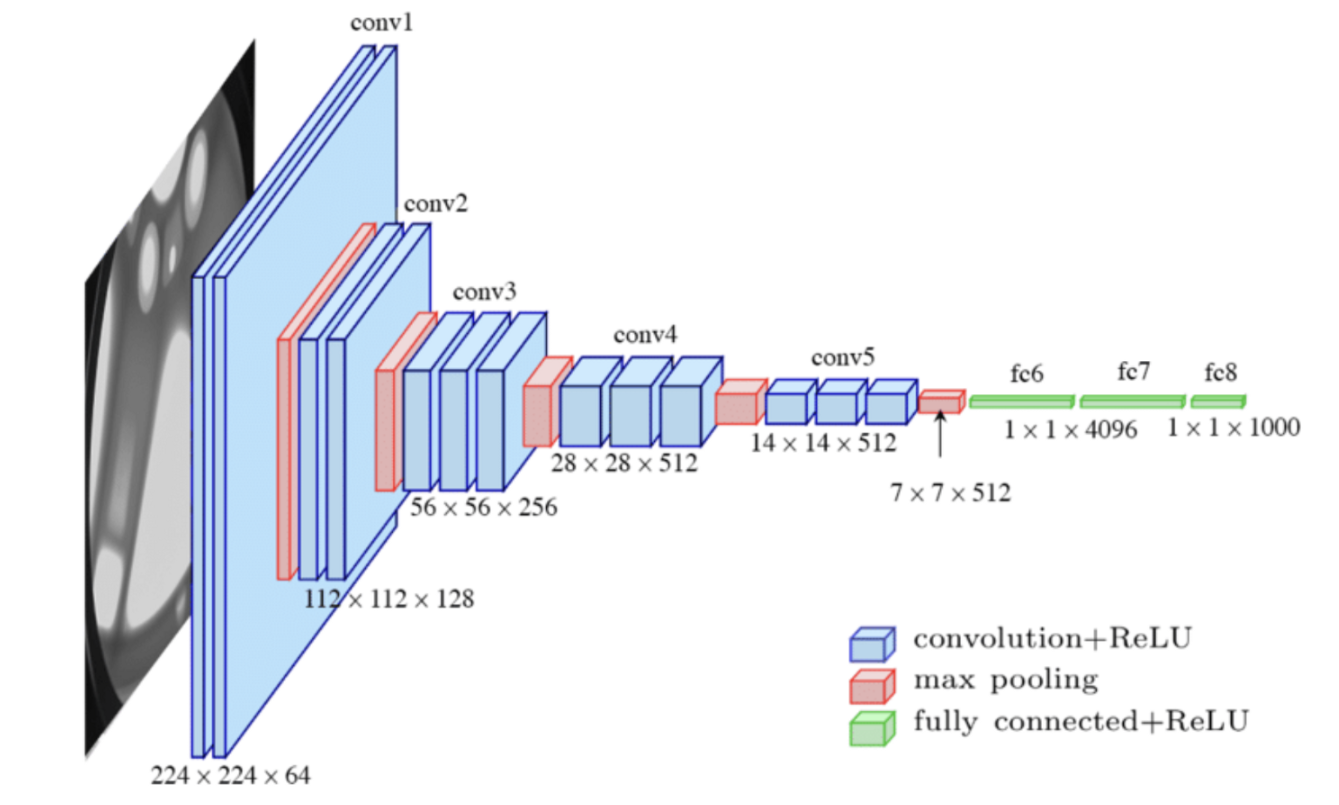

There is a lot of information in this image. So let us go over it step by step:

- We remark that there are a total of 16 layers, thus the name VGG16. These 16 layers can be divided into convolutional blocks, separated by pooling operations. These pooling operations reduce the size of the original image, which as we recall is 224x224 pixels by 2. Thus, after the first convolutional block, the image size is reduced to 112x112. Towards the end, we end up with images of size 7x7 only.

- Each convolutional block is further made of individual sections called convolutional layers. Each of these layers, have the common feature of having a convolutional step of 3x3. What does convolutional step mean? Convolution, as a mathematical operation, is the operation which integrates two functions, one of which is translated with respect to the other. In image manipulation, convolution is used to create effects such as blurring, detecting edges and sharpening images. In fact, common operations performed by image editing software such as Photoshop or Inkscape use the mathematical idea of convolution for such tasks. In practice, this takes the form of a matrix multiplication: local patches of the input image are locally modified by using smaller matrices called kernels to achieve the desired effect. This is shown in the following gif.

More examples can be found at the wonderful website by Andrej Karpathy. https://cs231n.github.io/convolutional-networks/

So 3x3 conv for each of the convolutional layers means that the kernel size is 3x3.

- Another piece of information provided is the number of filters used. This varies from one block to the next. In the beginning, we begin with 64 filters, and increase their number to 512. We observe that as we increase the number of filters, the size of the image is reduced via pooling. Increase the number of filters could be seen as a way of extracting the maximum possible information from the input, while at the same time reducing the image size. The number of the filters also determine the number of channels that the image has. Remember that in the beginning, we start with an RGB image, that is 3 channels, one for each color. After the image has passed through the first layer, 64 filters have acted upon it. Hence the image now has 64 channels. Thus going from the first layer to the next, we will not have 3 but 64 input channels. And so forth.

- Finally, between each convolutional layer, there is a hidden layer imbibing some non-linearity. This layer is not shown in the image above, but is mentioned in the original paper. The non-linearity is provided by the ReLU or Rectified Linear Unit. This is a mathematical function which has the following form:


To resume: each convolutional block is made up of a certain number of

- convolutional layers: which have a certain number of filters and a specific kernel size
- each convolutional layer is followed by a ReLU layer providing non-linearity
- a pooling layer which reduces the image size by half.

Once the input is passed through the 5 convolutional blocks, we encounter the classifier block. This block is constructed out of simpler layers, all of which are fully connected. Fully connected as the name suggests is a layer in which each neuron in the input is connected to each neuron in the output layer. Schematically, this looks like :


The number 4096 is the size of the output from the first two fully connected (or linear) layers. The last layer performs the classification. For the ImageNet task as seen previously, we require 1000 numbers each of which can be interpreted as the probability that the input image belongs to each of the 1000 classes. Once again, after each linear layer, we have a non-linear layer ReLU and a Dropout layer, which is a useful technique to prevent overfitting.

## Lets get coding 

We shall write a class called MyFirstNet inheriting from the nn.Module class. Some of the code has already been supplied below. You will require the following functions from the nn module

- Conv2d to create a basic convolutional layer. As parameters, we must supply the number of input channels, the number of output channels, the size of the kernel, and the padding. For instance, the first layer in the VGG16 net can be initialised as
- nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, padding = 1)
- ReLU to create the non-linear ReLU layer. We want to perform the operations in place, i.e. without creating new output. So we supply the argument inplace = True

- MaxPool2d to perform pooling operations i.e. reduce the size of the image. Since, we reduce the size by half, the argument kernel_size takes the value 2, and so does the argument stride.

- Linear to create a fully connected linear layer. This function takes the arguments in_features and out_features, both of which are fairly self-explanatory. For instance, the first linear layer in the VGG16 net can be initialized as

- nn.Linear(in_features = 512*7*7, out_features = 4096)

The number of in_features to this first layer is 512x7x7 since we have 512 filters at the end of the last convolutional block, and the image size has been reduced to 7x7.

- Dropout to perform Dropout operations.

- Since, the network is constructed in a modular fashion, we shall follow the same path by putting each block in its own container. PyTorch allows for such a container via the nn.Sequential container. We supply the layers we require as arguments to the function, and during training and testing, the input shall pass through each sequential container in the sequence provided. For instance, if we require a linear layer and a dropout layer within the same block called test, we can do it simply as

test = nn.Sequential(
       nn.Linear(in_features = 24, out_features = 24),
       nn.Dropout(),
)

You are required to perform the following operations

- Create a five convolutional blocks by putting them in Sequential containers. Call these blocks block1, block2 and so on.

- In each convolutional block, the order to be followed is Conv Layer -> ReLU -> Conv Layer -> ReLU -> ... -> Pooling where ... stand for the number of convolutional layers required.

- Create a final block called classify in a Sequential container with the linear, ReLU and dropout layers.

- The order to be followed is Linear -> ReLU -> Dropout

In [ ]:
class MyFirstNet(nn.Module):
    
    def __init__(self):
        super(MyFirstNet, self).__init__()
        self.categories = 1000 #Number of ImageNet categories
        #Insert your code here
        
        pass
        
        
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = x.view(x.size(0), -1)
        x = self.classify(x)
        return x

Congratulations You have just created your first deep neural network. Well, not quite since we haven't yet created an instance of MyFirstNet. So let's do that first

Create an instance of MyFirstNet and call it mynet.
Print mynet and observe the various layers defined.

In [ ]:
mynet = MyFirstNet()
print(mynet)
# -> MyFirstNet()

## Load the weights 
Since we still want to differentiate between cats and dogs, we can fill up the network we created using pre-trained parameters. PyTorch provides a few simple utility function.

Import the class model_zoo from the module torch.utils
Use the function load_url to load the pre-trained parameters into a variable called params_pre.
The parameters can be found at https://download.pytorch.org/models/vgg16-397923af.pth
Print the type of the variable params_pre

In [ ]:
from torch.utils import model_zoo
params_pre = model_zoo.load_url('https://download.pytorch.org/models/vgg16-397923af.pth')
type(params_pre)  # -> collections.OrderedDict


Once these parameters have been downloaded, we must give these parameters to our network. In the file utils_module_2, we have provided a function give_params_to_model, which takes in a network and a dictionary of parameters, and fills the network with these parameters.

Use the function give_params_to_model to provide the parameters params_pre to our network mynet

In [ ]:
from utils_module_2 import *
give_params_to_model(mynet, params_pre)

Our network is almost ready to be used. From this point onwards, we shall follow the steps in the previous lesson. Since we only want to differentiate between cats and dogs, we don't require 1000 categories in the final layer. Also, since we have given the parameters (or weights as they are called in the community) to the network, we don't want to change them during training. So we must set the attribute requires_grad to False for all the parameters of the network. Finally, we must replace the last layer in the classifier to a Linear layer of size 4096x2 i.e. in_features = 4096 and out_features = 2

- Set the attribute requires_grad for all network parameters to False
- Set the last layer of the classify block of the net to a Linear layer of size 4096x2
- Print mynet to see the changes

In [ ]:
for param in mynet.parameters():
    param.requires_grad = False
mynet.classify._modules['6'] = nn.Linear(in_features = 4096, out_features = 2)

print(mynet)

In [ ]:
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-17-8f7d8b243338> in <module>
      1 for param in mynet.parameters():
      2     param.requires_grad = False
----> 3 mynet.classify._modules['6'] = nn.Linear(in_features = 4096, out_features = 2)
      4 
      5 print(mynet)

/home/ubuntu/virtualenvs/python3/lib/python3.6/site-packages/torch/nn/modules/module.py in __getattr__(self, name)
    530                 return modules[name]
    531         raise AttributeError("'{}' object has no attribute '{}'".format(
--> 532             type(self).__name__, name))
    533 
    534     def __setattr__(self, name, value):

AttributeError: 'MyFirstNet' object has no attribute 'classify'

We will now use pre-calculated features to perform training. These are provided in a folder vgg16 and are stored as bcolz files. We have four files:

- train_features.bc -> Store the features of for the training set
- train_labels.bc -> Stores the labels of the training set
- val_features.bc -> Stores the features of the validation set
- val_labels.bc -> Stores the labels of the validation set.

Define a variable data_dir and set it to data/module_1
Use the load_array function to store each of these files in variables train_feat, train_label, val_feat and val_label.
    load_array is a function provided in the  utils_module_2.py  file.

In [ ]:
data_dir = 'data/module_1'
train_feat = load_array(data_dir+'/vgg16/train_features.bc')
train_label = load_array(data_dir+'/vgg16/train_labels.bc')
val_feat = load_array(data_dir+'/vgg16/val_features.bc')
val_label = load_array(data_dir+'/vgg16/val_labels.bc')

Remember your training Luke
We can now move on to the final phase i.e. training. Just as we had done in the previous lesson, we shall use stochastic gradient descent to train our network

Define a variable learning_rate and initalize with the value 1e-4
Declare an optimizer optimizer_mynet with a learning rate learning_rate for the last layer of mynet

In [ ]:
learning_rate = 1e-4
optimizer_mynet = torch.optim.SGD(mynet.classify[6].parameters(),lr = learning_rate)
# meme error 'classify'

We can now use the function trainer_generic to train our network. Remember that the data size was 1200 for the training set and 200 for the validation set.

Use the function trainer_generic to train mynet over the samples of the training set using train_feat and label_feat as done in the last lesson. Perform the training for 10 epochs.
Once training completed, use training_generic again to evaluate the performance of the model over the validation dataset

In [ ]:
trainer_generic(model = mynet.classify,size =1200, features = train_feat, labels = train_label,
            epochs = 10, optimizer=optimizer_mynet,train=True,shuffle=True)

In [ ]:
# enter code for testing

In [ ]:
trainer_generic(model=mynet.classify, size = 200, features = val_feat, labels=val_label,
               train = False, shuffle = False)

### C - Gradient Descent, Backprop and Whatnot 
## A little math ain't hurt no one!
In the preceding two modules, we have used a pre-trained network to distinguish between cats and dogs, and then wrote our very own implementation of the famous VGG16 deep neural network. As things stand, you are well on your way to start using off-the-shelf networks for your own deep learning tasks. However, for the moment we haven't learned to understand how learning actually happens. As you may recall, we have been using the trainer_generic function to train (and test) our networks. If you were curious enough, you would have observed that this function required a whole host of parameters to be run properly. The obvious question to ask is: What is happening under the hood, so to speak?

Another question is: What is all this gradient descent business all about? and what is backpropagation? Turns out the answers to these questions and the previous question are interrelated. In this module, we shall answer these questions. Caveat emptor: This will require some math, but the effort is worth it.

## A generic learning task ¶

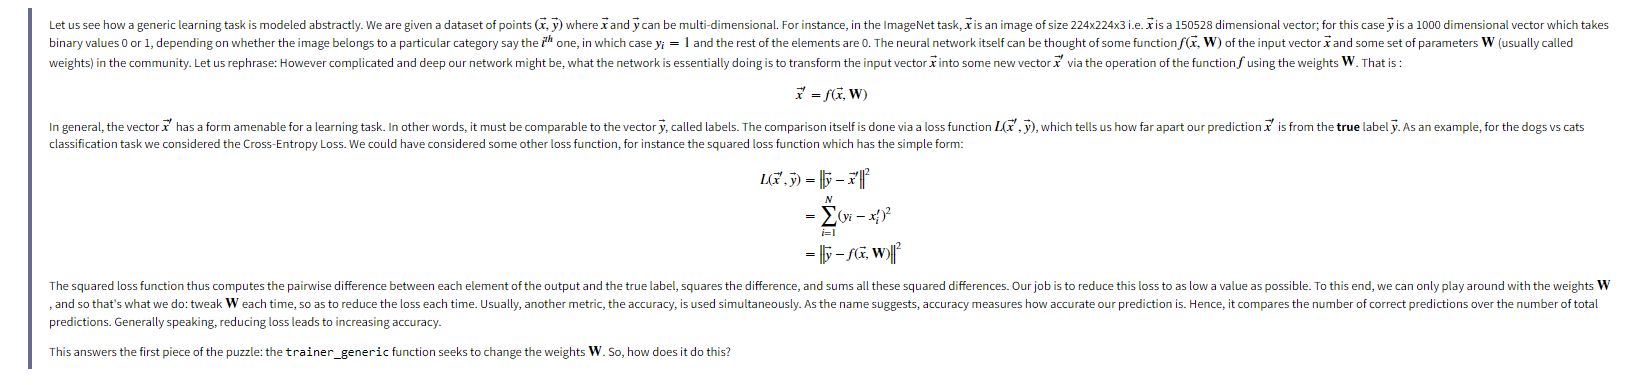

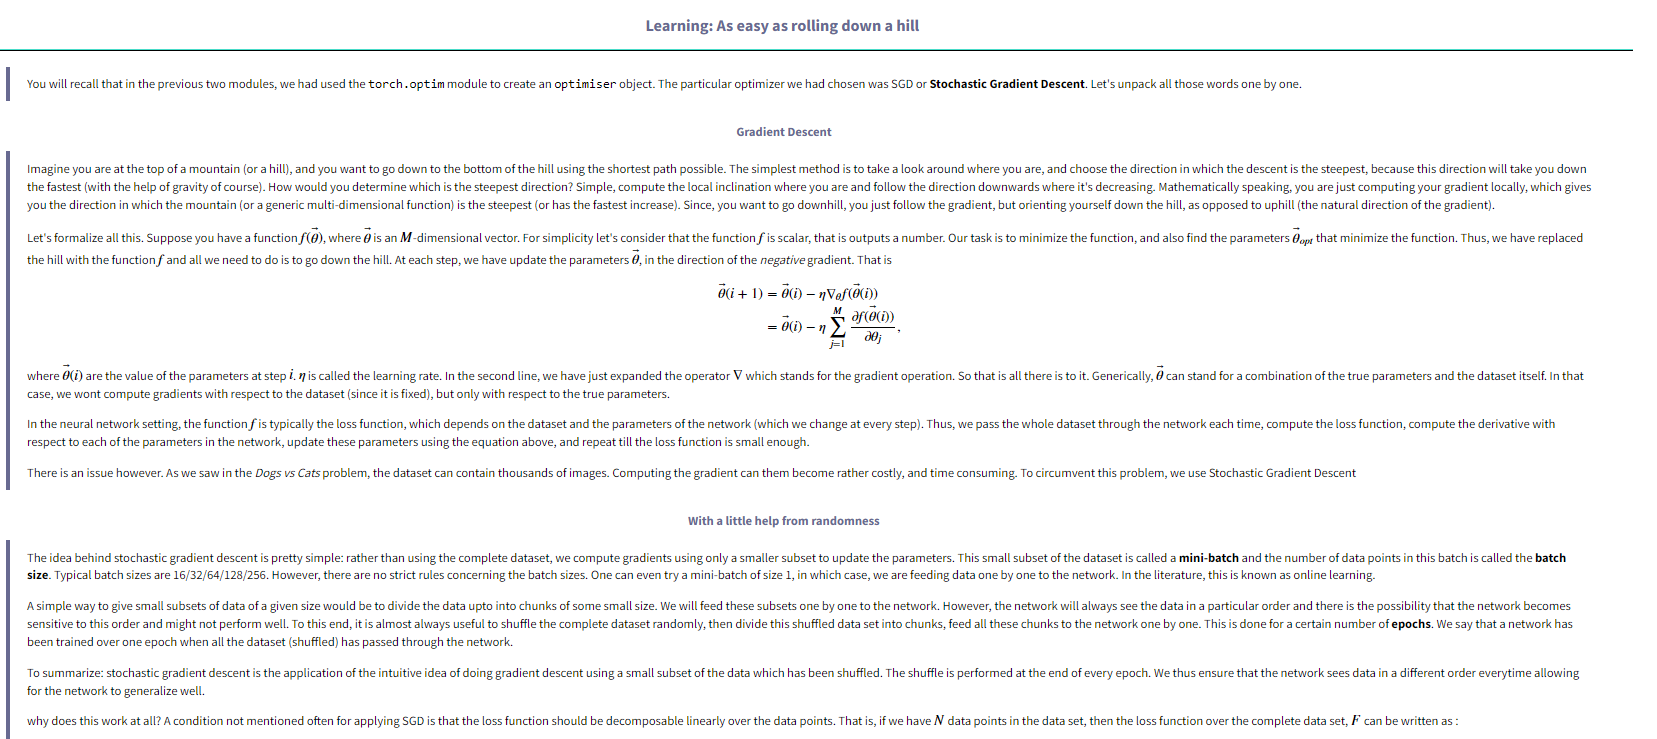

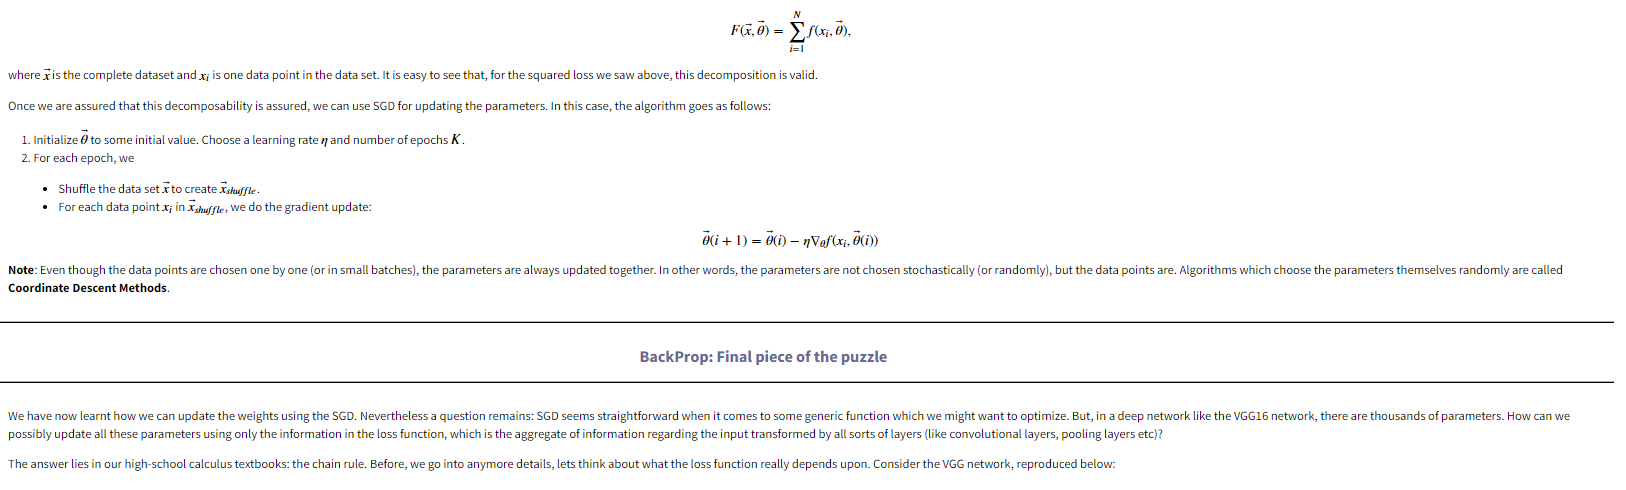

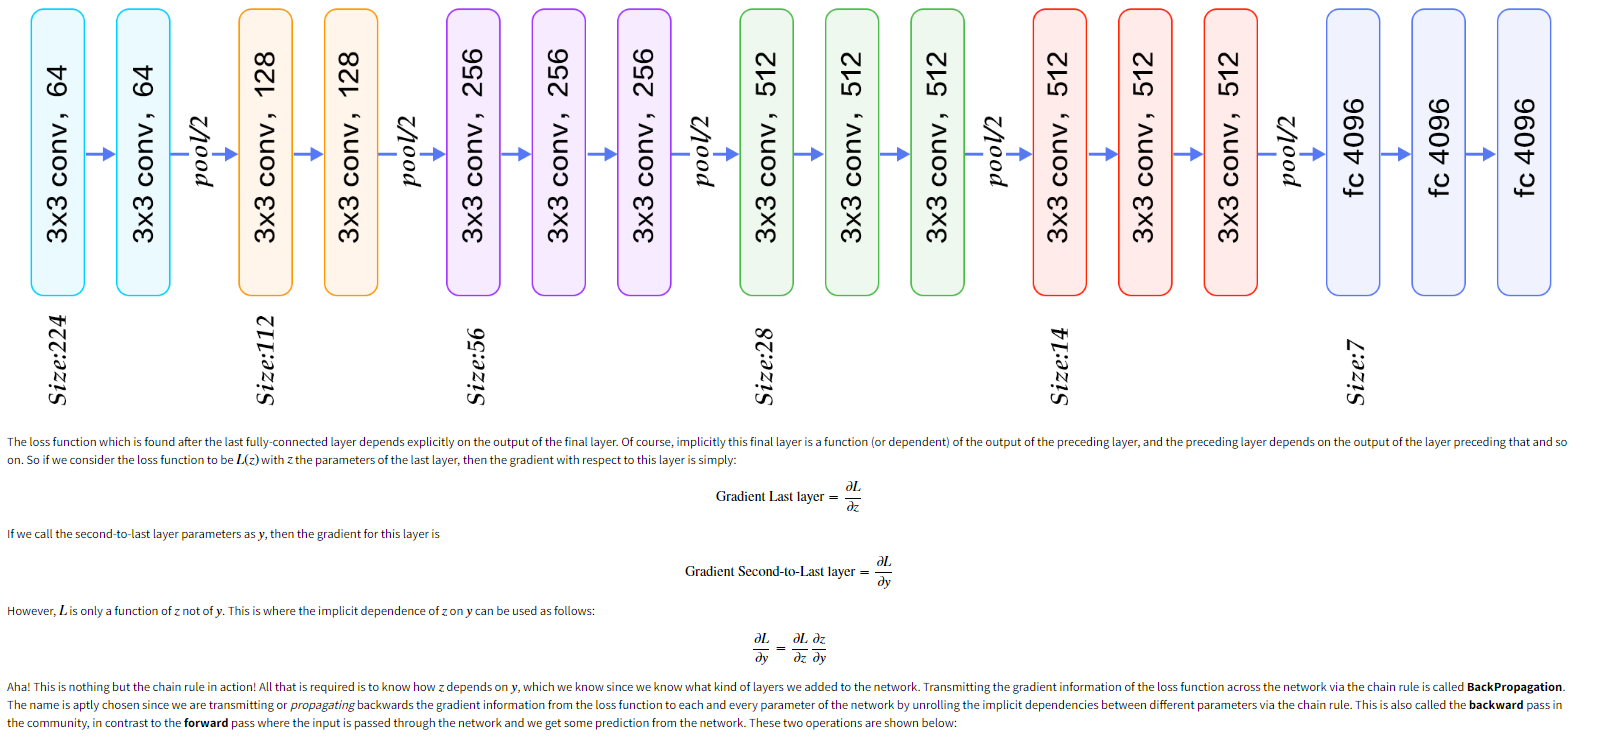

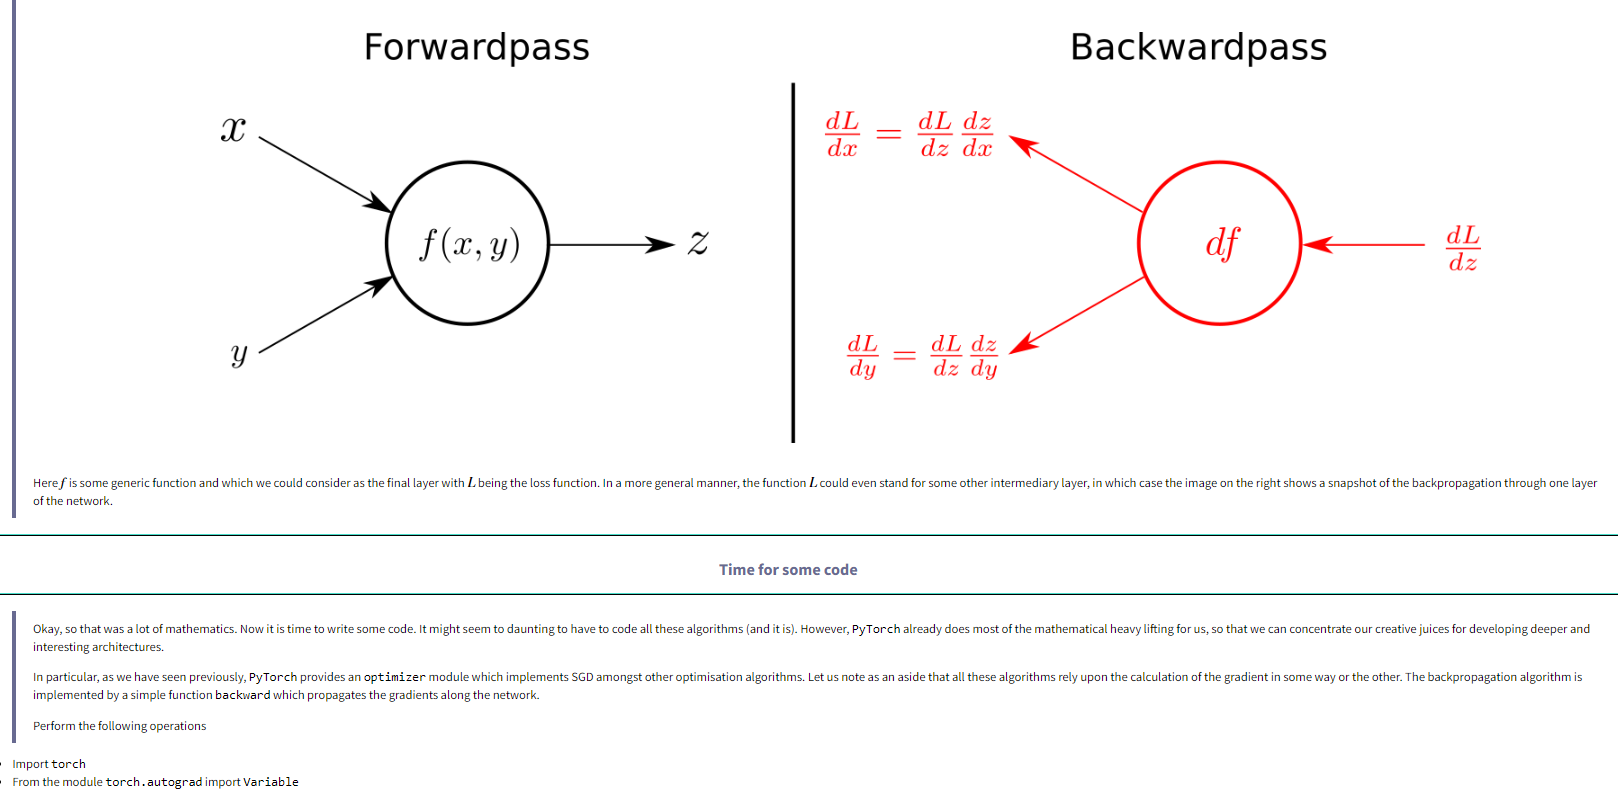

In [ ]:
import torch
from torch.autograd import Variable

Create a new variable var1 of type Variable and set its attribute requires_grad to True
Print the type of var1

In [ ]:
var1 = Variable(requires_grad = True)
print(type(var1))
# -> <class 'torch.Tensor'>

We note that the var1 has a rather complicated type, in that it is not a standard python type such as list or dict. Indeed, it is an instance of the class Variable which itself inherits from the autograd class. The autograd class contains all the functionalities for computing gradients and storing them in a simple manner. autograd itself stands for automatic gradient, which uses a computational graph to compute gradients in an efficient manner. We shall not go into the details of computational graphs in this series of introductory modules. The requires_grad attribute must be set to True if we want to compute gradients with respect to var1

var1 which is a Variable has many different attributes and functions. A useful one is data which is the data stored in the Variable.

Using the data attribute, set the data inside var1 to a 3x3 tensor full of ones. We can use the torch.ones function for this.
Print the data inside var1.
Check that the attribute grad of var1 is set to None.

In [ ]:
var1.data = torch.ones(3,3)
print(var1.data)
print(var1.grad)

In [ ]:
"""
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
None
"""

Here, we separated the initialization of the variable var1 and the data inside it in two different steps. However, we can do it in one step by passing the data and requires_grad attributes as arguments to the Variable constructor.

Initialise var1 with a tensor of size 3x3 (all ones) and set requires_grad to True.
Try doing both these operations in a single line of code

In [ ]:
var1 = Variable(data = torch.ones(3,3), requires_grad = True)

Once we have defined a Variable instance, we can create functions of this variable using some of the member functions of the instance itself by doing the following

var1bis = var1.sin()

Create a new variable var2 which is the cosine of var1
Create a new variable var3 which is the tangent of var1
Create a new variable var4 which is the squared of var2
Create a new variable var5 which is the exponential of the sum of var4 and var3

You might need a variable temp to store the sum of var4 and var3

In [ ]:
var2 = var1.cos()
var3 = var1.tan()
var4 = var2 * var2
temp = var4 + var3
var5 = temp.exp()

Print the data in var5 and verify that all the entries are equal to 6.3356

In [ ]:
print(var5.data)


In [ ]:
"""
tensor([[ 6.3556,  6.3556,  6.3556],
        [ 6.3556,  6.3556,  6.3556],
        [ 6.3556,  6.3556,  6.3556]])
"""

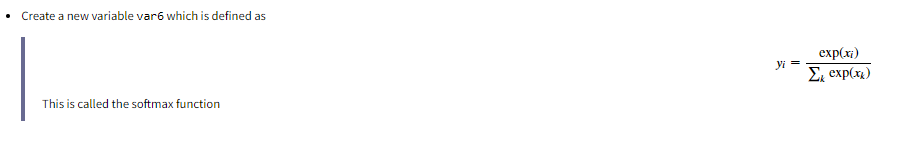

In [ ]:
var6 = var5/var5.sum()
print(var6)

In [ ]:
"""
tensor([[ 0.1111,  0.1111,  0.1111],
        [ 0.1111,  0.1111,  0.1111],
        [ 0.1111,  0.1111,  0.1111]])
"""

All these operation till this point could be considered as operations performed on the input variable as it passes through a neural network. This is what we had called the forward pass in the introduction. The backward pass can be performed using the backward function on the final variable.

Create a final variable var7 which is the sum of all the elements of the tensor var5
Use the function backward on var7 to propagate the gradients through each of the preceding variables. Remember backward is a member function of var7. Set the retain_graph argument to the backward function to True
Print the gradients stored in var1

In [ ]:
var7 = var5.sum()
var7.backward( retain_graph=True)
print(var1.grad)

In [ ]:
"""
tensor([[ 15.9921,  15.9921,  15.9921],
        [ 15.9921,  15.9921,  15.9921],
        [ 15.9921,  15.9921,  15.9921]])
"""

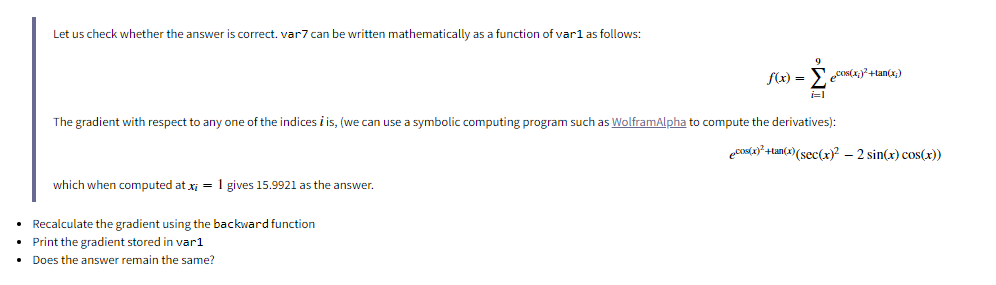

In [ ]:
var7.backward(retain_graph=True)
print(var1.grad)


In [ ]:
"""
tensor([[ 31.9841,  31.9841,  31.9841],
        [ 31.9841,  31.9841,  31.9841],
        [ 31.9841,  31.9841,  31.9841]])
"""

The gradients have changed. Run it a couple of times to see that the gradients always seem to increase. We would expect that the gradients calculated with respect to some variables to not change when evaluated at some fixed value. What is happening here? It turns out that by default, PyTorch accumulates gradients in the variable var1 every time we backpropagate the gradients. Notice that the gradients increase always by the fixed amount 15.9921. So we conclude that although the gradient actually computed each time backward is called is the same (with respect to var1), the final gradient stored in var1.grad is added to the previously stored value of the gradient.

This, at first might seem extremely bizarre behavior. Why would we ever want to accumulate gradients over time? This bizarre behavior is in fact a requirement when we want to train Recurrent Neural Networks(RNN) which we shall encounter later in this series of lessons. For the moment, to prevent the accumulation of the gradients, we can use the zero_ function in the data attribute of the gradients to set them gradients to zero.

Set the gradients stored in var1 to zero.
Call the backward function on var7 again.
Print the grad attribute of var1.
Repeat these steps a few times to verify that gradients are not being accumulated in var1.

In [ ]:
var1.grad.data.zero_()
var7.backward(retain_graph=True)
print(var1.grad)

In [ ]:
"""
tensor([[ 15.9921,  15.9921,  15.9921],
        [ 15.9921,  15.9921,  15.9921],
        [ 15.9921,  15.9921,  15.9921]])
"""

This is great progress. Using the backward function, we don't need to explicitly compute the gradients at all with respect to the variables upon which our functions (or our networks) depend. We checked that these gradients are indeed correct with respect to the variable var1 but what about the implicit dependence via the variables var2, var3 etc.

Print the gradients stored in the variables var2 and var3.

In [ ]:
print(var2.grad)
print(var3.grad)
# -> none
# -> none

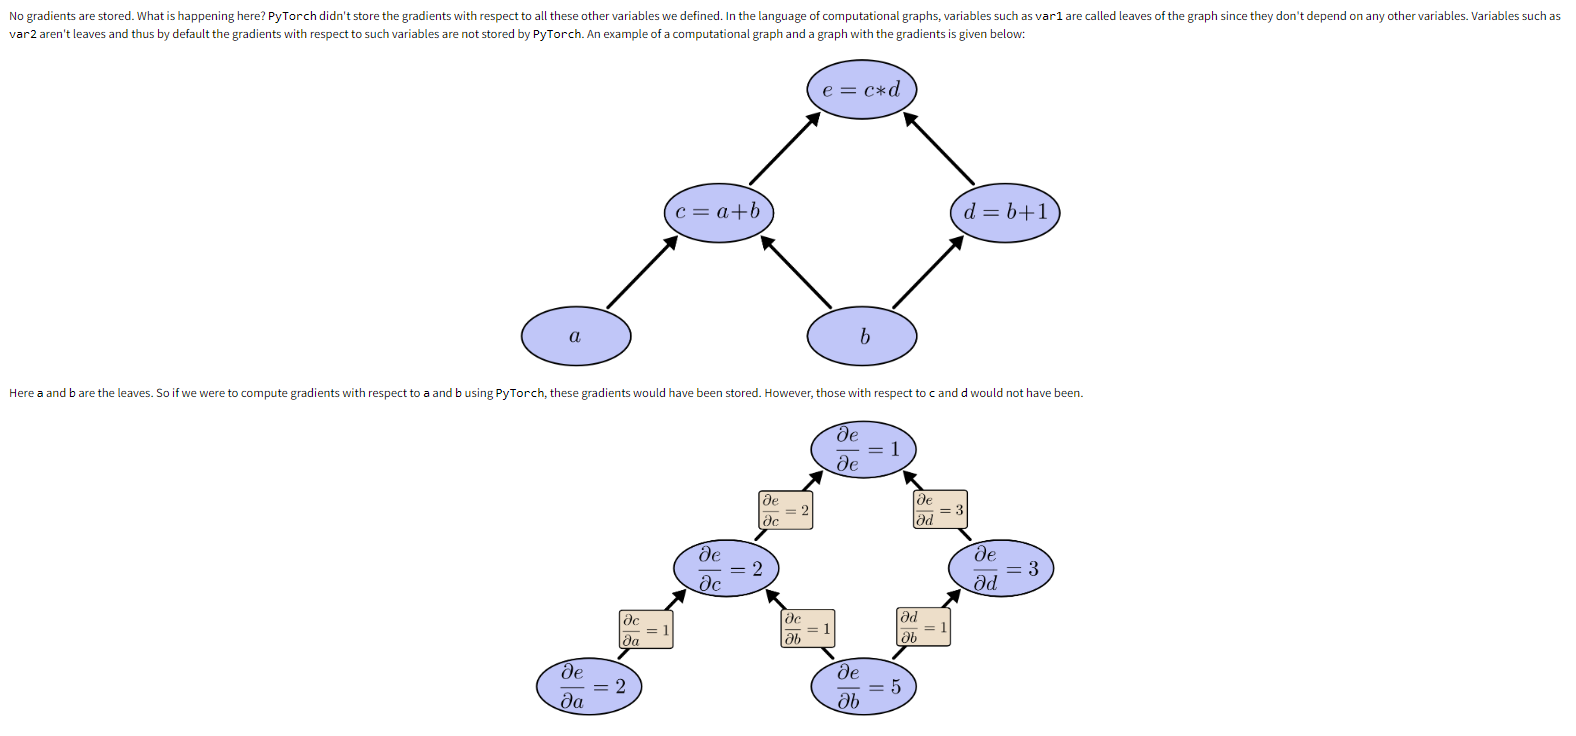

Nevertheless, if we want to store the gradients with respect to these other variables, we can simply use the retain_grad function for any of these variables.

Set the gradients of var1 to zero.
Redefine the variables from var2 to var5 as done above.
Use the function retain_grad to store the gradients of the variables var2 and var3.
Redefine var7 as the sum of all terms in var5

In [ ]:
var1.grad.data.zero_()
var2 = var1.cos()
var3 = var1.tan()
var4 = var2 * var2
temp = var4 + var3
var5 = temp.exp()
var7 = var5.sum()
var2.retain_grad()
var3.retain_grad()

Propagate back the gradients using backward
Print the gradients stored in var1, var2 and var3
Verify that just as with var1 the gradients are accumulated in var2 and var3 as well (unless they are explicitly set to zero).

In [ ]:
var7.backward(retain_graph=True)
print(var1.grad)
print(var2.grad)
print(var3.grad)

In [ ]:
"""
tensor([[ 15.9921,  15.9921,  15.9921],
        [ 15.9921,  15.9921,  15.9921],
        [ 15.9921,  15.9921,  15.9921]])
tensor([[ 6.8679,  6.8679,  6.8679],
        [ 6.8679,  6.8679,  6.8679],
        [ 6.8679,  6.8679,  6.8679]])
tensor([[ 6.3556,  6.3556,  6.3556],
        [ 6.3556,  6.3556,  6.3556],
        [ 6.3556,  6.3556,  6.3556]])
"""

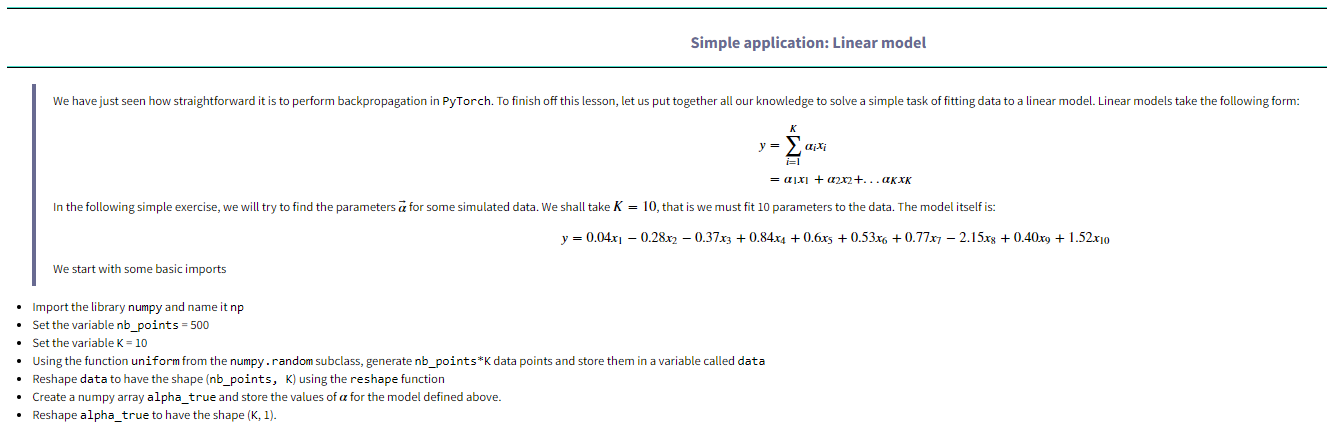

In [ ]:
import numpy as np 
nb_points = 500
K = 10
data = np.random.uniform(size=nb_points*K)
data = data.reshape((nb_points,K))
alpha_true = np.array([0.04,-0.28,-0.37,0.84,0.6,0.53,0.77,-2.15,0.40,1.52])
alpha_true = alpha_true.reshape((K,1))

Now, let us compute the true predictions of the model. This can be done by performing a simple matrix-vector product between the variables data and alpha_true.

Compute the matrix-vector product between data and alpha_true and store it in the variable y_true.
Reshape y_true so that it has the shape (nb_points, 1).

   Remember that matrix-vector multiplication can be performed between  numpy  arrays via the function  np.dot 

In [ ]:
y_true = np.dot(data,alpha_true)
y_true = y_true.reshape((nb_points,1))
print(y_true.shape)
# -> ( 500, 1)

Since, we will be using neural networks in PyTorch we need to use tensors and not numpy arrays to fit the model defined above. PyTorch provides a method from_numpy to convert numpy arrays to torch tensors with the same shape as the original array.

Create a new tensor data_tensor from the array data using the from_numpy function
Create a new tensor y_true_tensor from the array y_true

In [ ]:
data_tensor = torch.from_numpy(data).type(torch.FloatTensor)
y_true_tensor = torch.from_numpy(y_true).type(torch.FloatTensor)

Once we have the tensors, we must transform them into Variables since we want to use the automatic gradient calculation that PyTorch provides to simplify our task as much as possible. Remember, that we want to compute the gradients only with respect to the  α⃗ α→  and not with respect to the data.

Create a Variable called data_variable from the tensor data_tensor. Set requires_grad accordingly.
Create a Variable called y_variable from the tensor y_true_tensor. Set requires_grad accordingly.
Create alpha_variable from the tensor alpha_init_tensor, but only via a copy of it. This can be achieved via the clone function available for all tensor types in torch.
   We must pass a copy of the  alpha_init_tensor  for the new variable since during training, even though its gradients will change, the data stored in it will be the same as that of the original tensor. We only want to initialize the variable with some random numbers. We must change these numbers

In [ ]:
data_variable = Variable(data_tensor, requires_grad = False)
y_variable = Variable(y_true_tensor, requires_grad = False)
# alpha_variable = Variable(alpha_init_tensor.clone(), requires_grad = True)

Finally, let us create a simple neural network to fit this model. We wont be creating an elaborate network this time since the problem is a simple one. Nevertheless, we shall be writing our own gradient descent implementation using gradients computed via the backpropagation algorithm.

Create a neural network called linear_model. Add a single Linear layer. Set in_features to K and out_features to 1. Set bias to False
The size of this layer should be Kx1 (since we have K parameters to fit)
The network should have been initiated with some predefined weights.

Print the initial weights using the weight attribute of the network

In [ ]:
linear_model = torch.nn.Linear(in_features = K,out_features = 1, bias=False)
print(linear_model.weight)

In [ ]:
"""
Parameter containing:
tensor([[-0.1053, -0.0289,  0.2271,  0.2998,  0.0865,  0.2872, -0.1332,
         -0.3012, -0.0117,  0.2283]])
"""         

There are a myriad loss functions that are provided in torch. Let us use the Mean Squared Loss, which was defined at the beginning of the lesson which sums the squares of the differences between the value predicted by the network and the true values.

Define a variable loss_function using the MSELoss function in the nn submodule. Set the attribute size_average to False.
Define a variable learning_rate and set it to 1e-4.

In [ ]:
loss_function = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-4

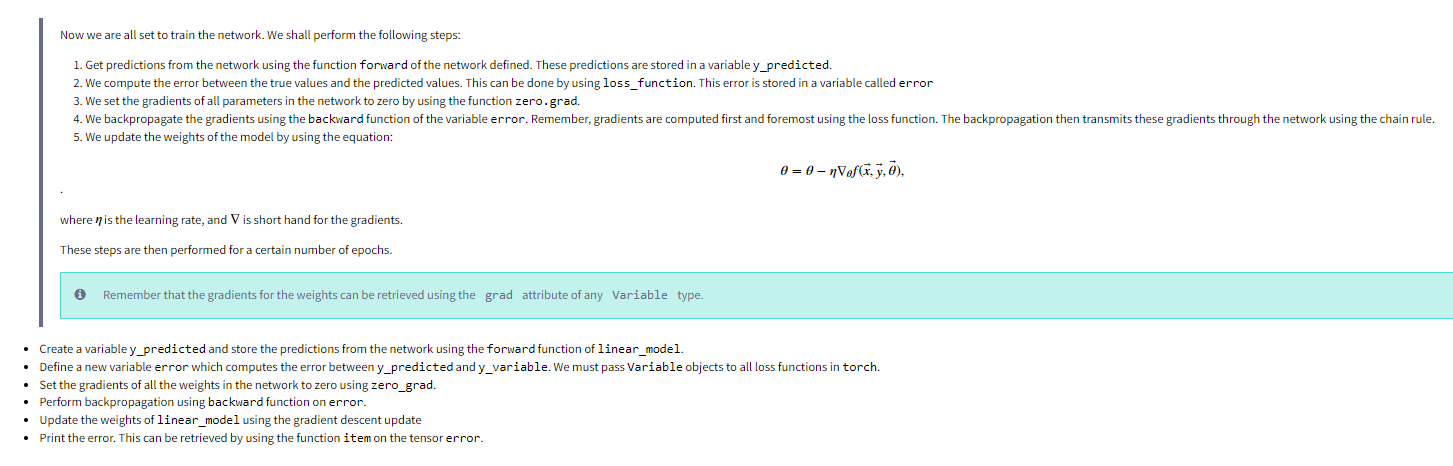

In [ ]:
y_predicted = linear_model.forward(data_variable)
error = loss_function(y_predicted, y_variable)
linear_model.zero_grad()
error.backward()
linear_model.weight.data = linear_model.weight.data - learning_rate*linear_model.weight.grad.data
print(error.item())
# -> 543.8042602539062

After running it for a few times, we realise that the error is definitely decreasing. Let us run it for a certain number of epochs.

Define a variable nb_epochs and set it to 300
Perform the steps performed above for each epoch.

In [ ]:
nb_epochs = 300
for epoch in range(nb_epochs):
    y_predicted = linear_model.forward(data_variable)
    error = loss_function(y_predicted, y_variable)
    linear_model.zero_grad()
    error.backward()
    linear_model.weight.data = linear_model.weight.data - learning_rate*linear_model.weight.grad.data
    print("Epoch: {} Error: {}".format(epoch, error.item()))   

In [ ]:
"""
Epoch: 0 Error: 432.3406982421875
Epoch: 1 Error: 368.1263427734375
Epoch: 2 Error: 330.2024841308594
Epoch: 3 Error: 306.923583984375
Epoch: 4 Error: 291.8202819824219
Epoch: 5 Error: 281.2974853515625
Epoch: 6 Error: 273.3564147949219
Epoch: 7 Error: 266.8872375488281
Epoch: 8 Error: 261.2716979980469
Epoch: 9 Error: 256.16619873046875
Epoch: 10 Error: 251.3792724609375
..........
Epoch: 294 Error: 1.7345024347305298
Epoch: 295 Error: 1.704795241355896
Epoch: 296 Error: 1.6756035089492798
Epoch: 297 Error: 1.64691162109375
Epoch: 298 Error: 1.618715763092041
Epoch: 299 Error: 1.5910049676895142
"""

Compare the weights of the network and the true values of the parameters  α⃗ α→ . As you repeat the process above for more and more epochs, the difference between the weights and the true parameters should decrease

In [ ]:
print(linear_model.weight.data)
print(alpha_true.T)

In [ ]:
"""

tensor([[ 0.0509, -0.2571, -0.3214,  0.8126,  0.5530,  0.5437,  0.7108,
         -2.0137,  0.3953,  1.4283]])
[[ 0.04 -0.28 -0.37  0.84  0.6   0.53  0.77 -2.15  0.4   1.52]]
"""